# Music Genre Classifier


---
Dr. Aritan Piplai | Machine Learning | Fall 2023 | CS4361
<br>
<br>
Alan Ochoa | Sergio Velasco | Seth Velasco




Library Imports

In [62]:
import os
import math
import pickle
import random
import operator
import librosa
import json
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io.wavfile as wav
from importlib import reload
from python_speech_features import mfcc
import seaborn as sns
from tempfile import TemporaryFile
from sklearn.preprocessing import normalize

from importlib import reload
plt=reload(plt)

Kaggle Account Token Upload:

In [63]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aeochoa","key":"afe36392606eab83ee0cfb7f73a52233"}'}

# GZTan

Retrieving GZTan Dataset:

In [64]:
%%shell
mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json
ls ~/.kaggle

pip install kaggle
pip install python_speech_features
kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
unzip gtzan-dataset-music-genre-classification.zip

kaggle.json
gtzan-dataset-music-genre-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  gtzan-dataset-music-genre-classification.zip
replace Data/features_30_sec.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: D

## Inspecting the Dataset

In [66]:
music_data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

### Blues

In [67]:
data, sr = librosa.load('/content/Data/genres_original/blues/blues.00000.wav')
music_data = pd.read_csv('/content/Data/features_30_sec.csv')
music_data.head(5)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


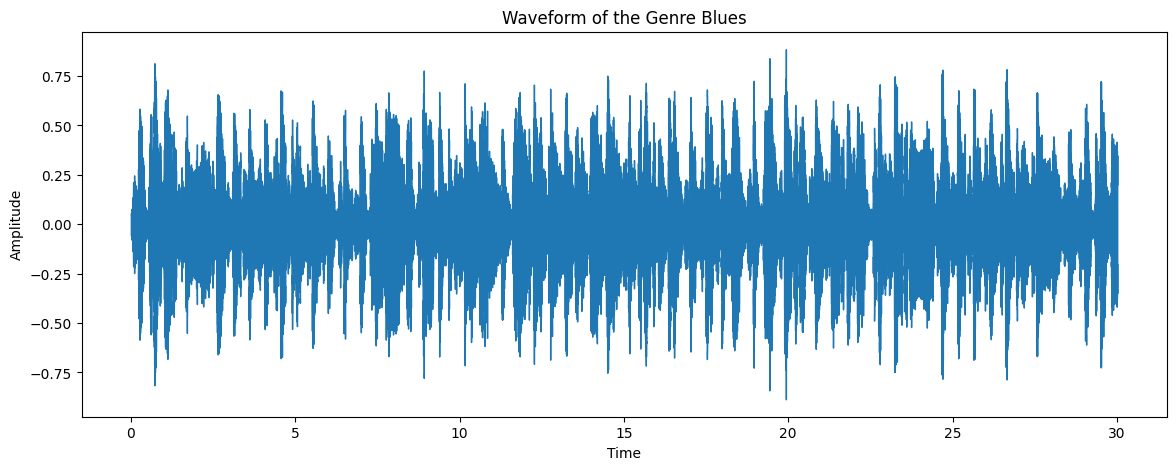

In [ ]:
path = '/content/Data/genres_original/blues/blues.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr)

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Blues')
plt.show()

Country

In [ ]:
data, sr = librosa.load('/content/Data/genres_original/classical/classical.00000.wav')
music_data = df[df['label'] == 'classical']
music_data.head(5)

SyntaxError: ignored

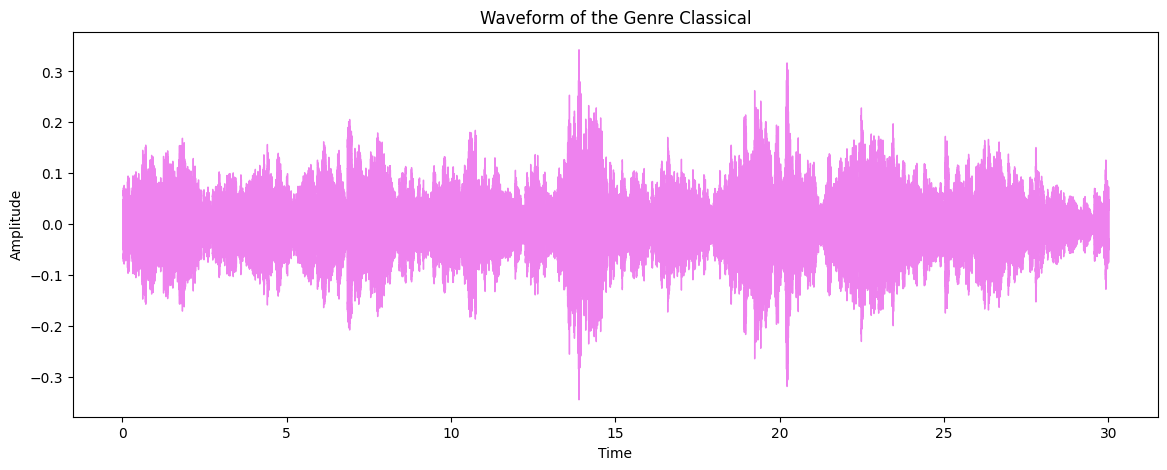

In [ ]:
path = '/content/Data/genres_original/classical/classical.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='violet')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Classical')
plt.show()

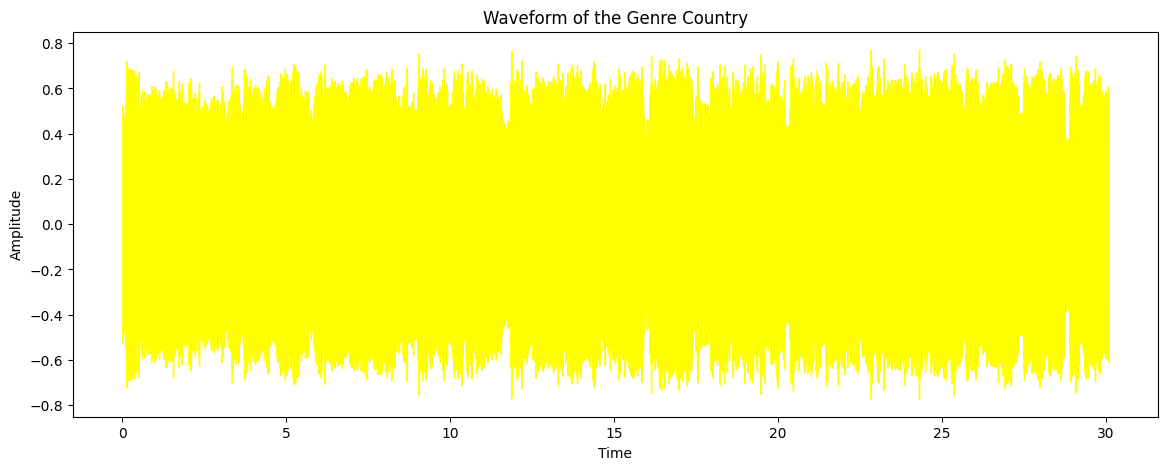

In [ ]:
path = '/content/Data/genres_original/country/country.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='yellow')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Country')
plt.show()

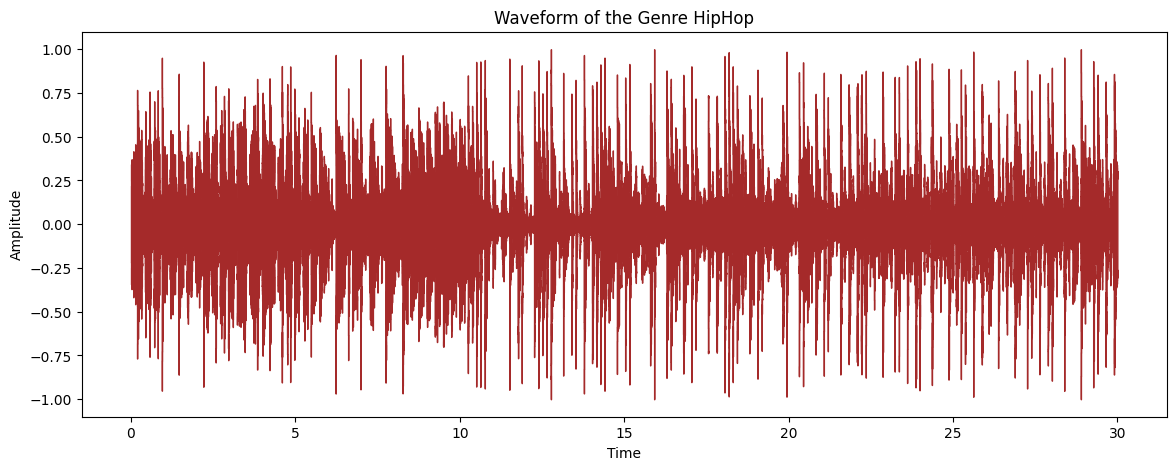

In [ ]:
path = '/content/Data/genres_original/hiphop/hiphop.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='Brown')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre HipHop')
plt.show()

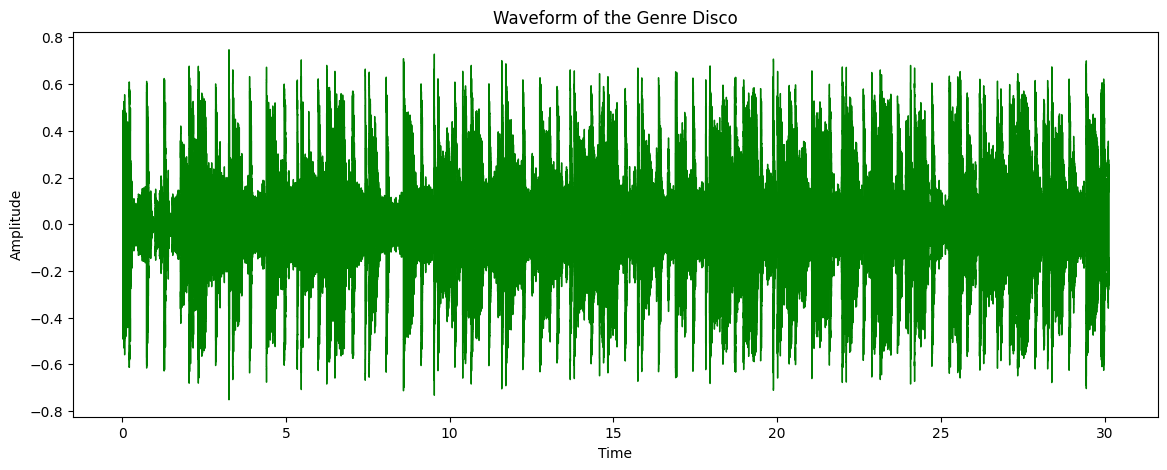

In [ ]:
path = '/content/Data/genres_original/disco/disco.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='green')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Disco')
plt.show()

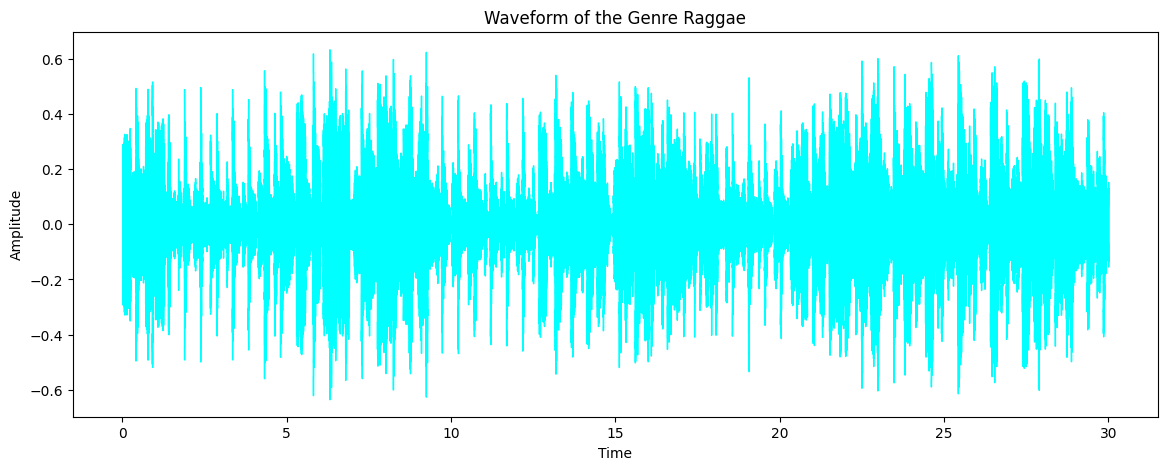

In [ ]:
path = '/content/Data/genres_original/reggae/reggae.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='aqua')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Raggae')
plt.show()

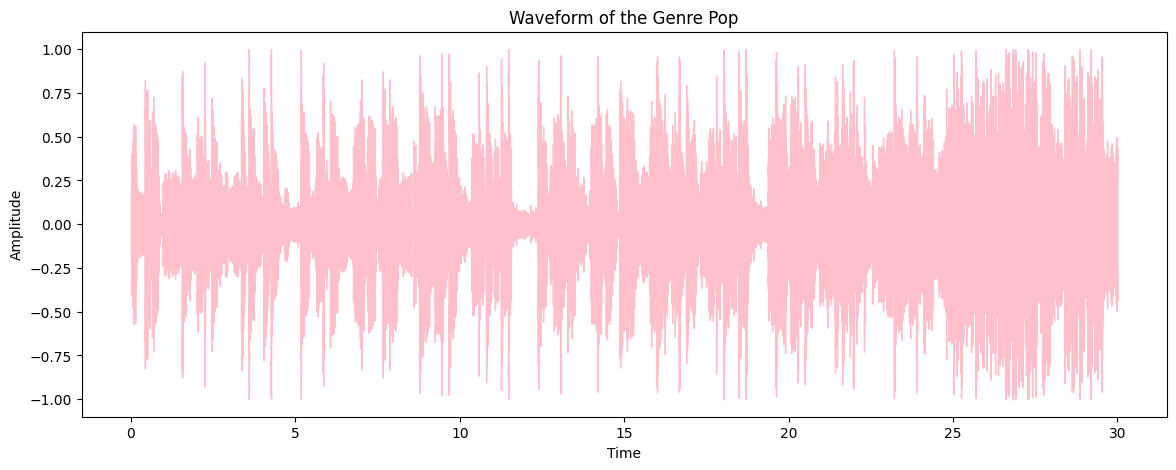

In [ ]:
path = '/content/Data/genres_original/pop/pop.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='pink')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Pop')
plt.show()

Metal

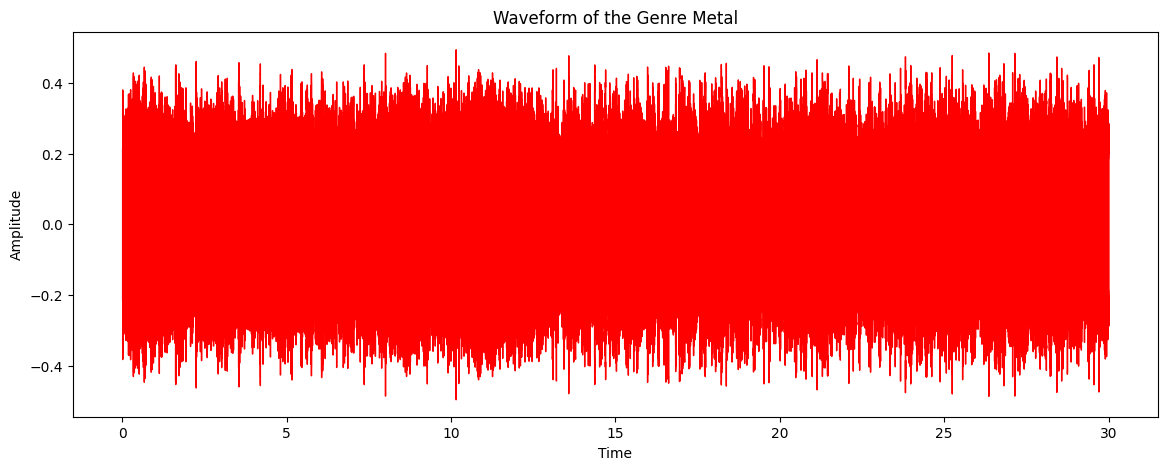

In [ ]:
path = '/content/Data/genres_original/metal/metal.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='red')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Metal')
plt.show()

Jazz

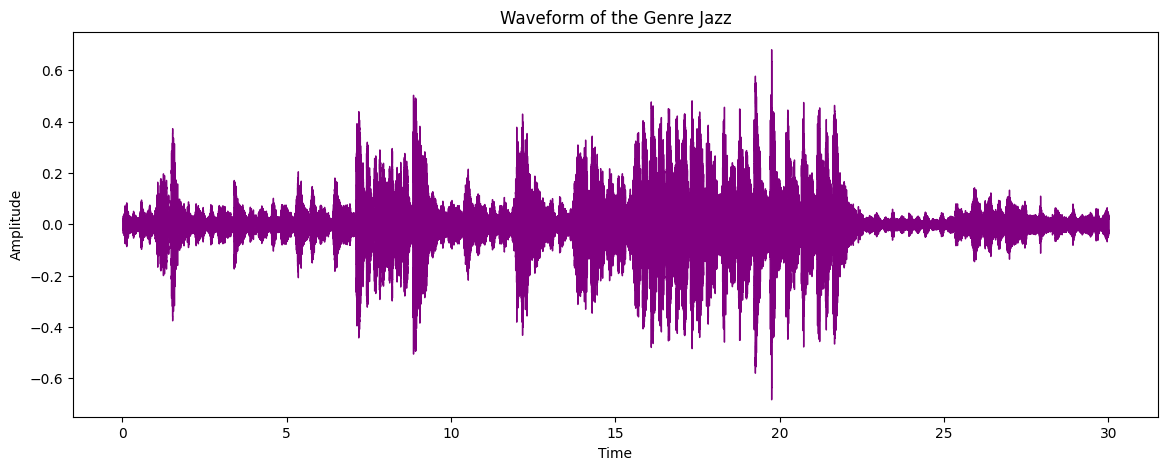

In [ ]:
path = '/content/Data/genres_original/jazz/jazz.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='purple')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Jazz')
plt.show()

Rock

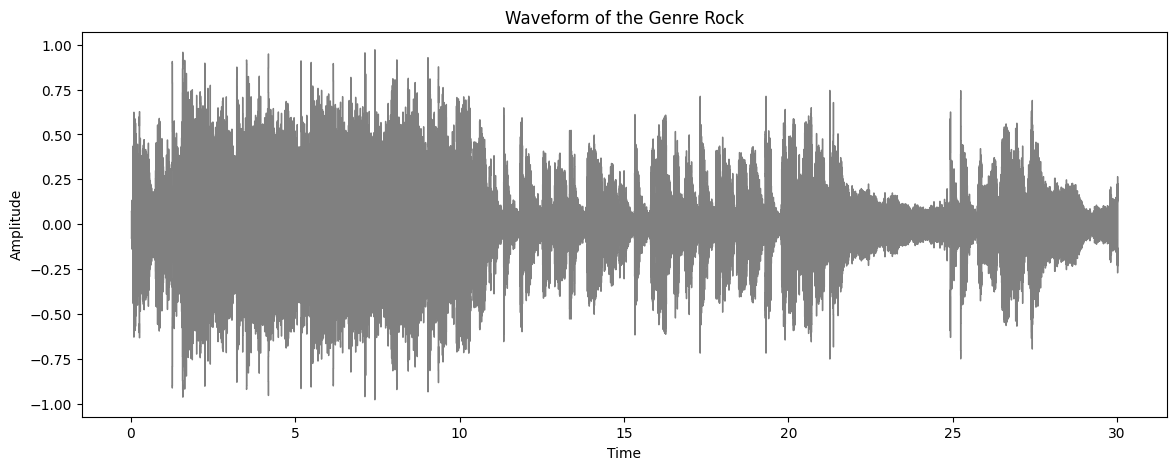

In [ ]:
path = '/content/Data/genres_original/rock/rock.00000.wav'
plt.figure(figsize=(14, 5))
x, sr = librosa.load(path)
librosa.display.waveshow(x, sr=sr, color='grey')

plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform of the Genre Rock')
plt.show()

Mean Correlation between genres

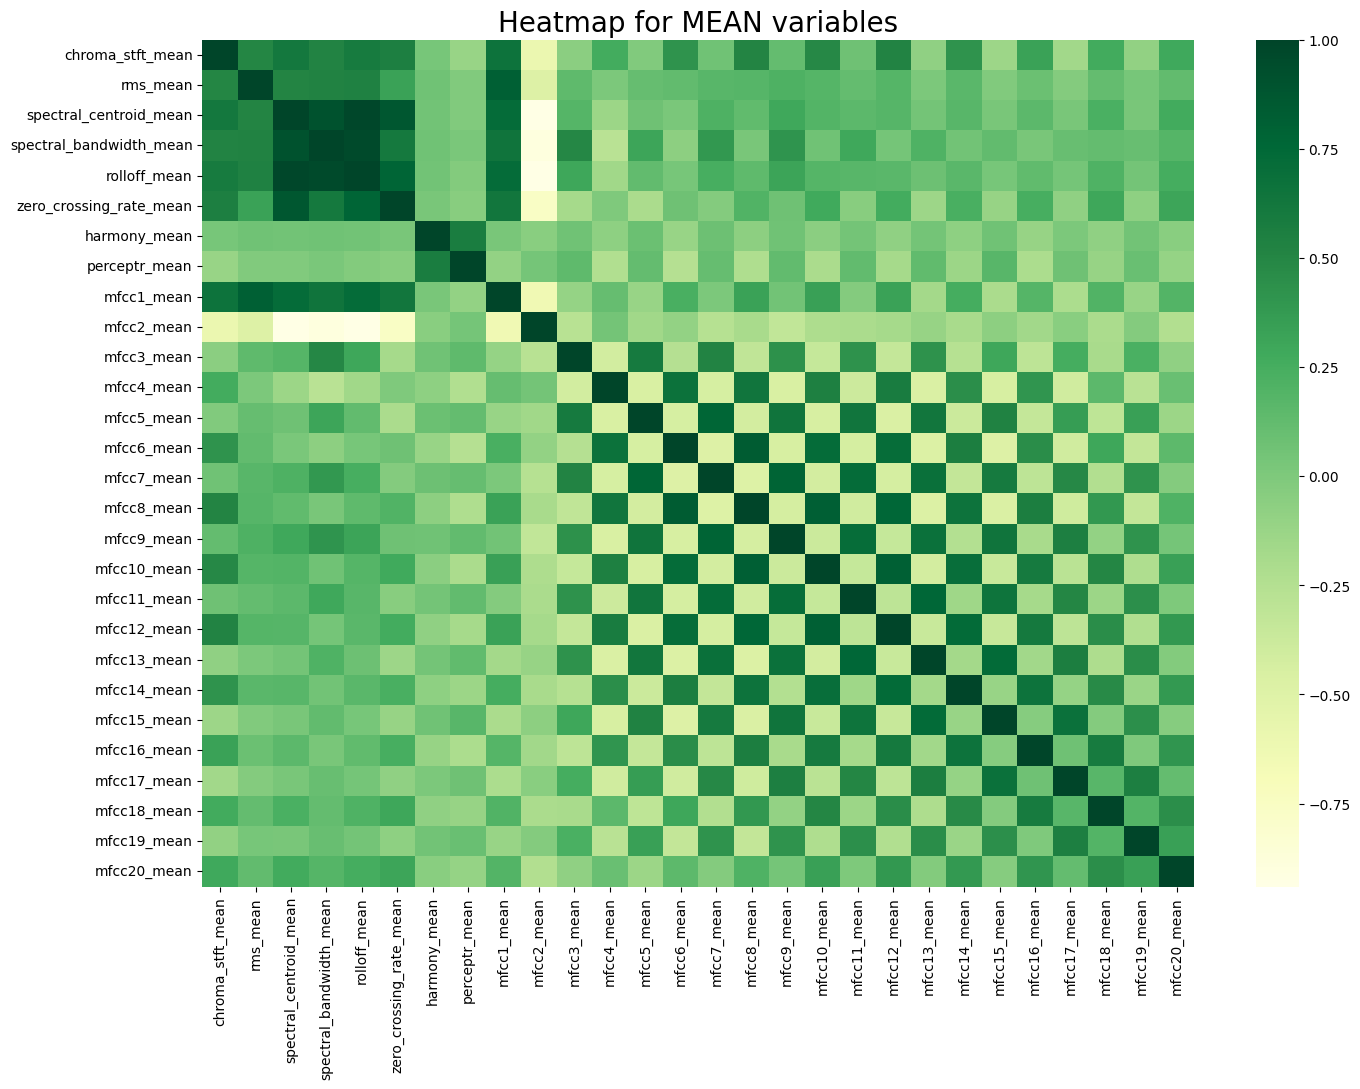

In [ ]:
# Computing the Correlation Matrix
spike_cols = [col for col in music_data.columns if 'mean' in col]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(music_data[spike_cols].corr(), cmap='YlGn')

plt.title('Heatmap for MEAN variables', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

## Data Processing

In [69]:
dataset_path = r"../content/Data/genres_original"

In [70]:
# Constants
SAMPLE_RATE = 22050
DURATION = 30
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

In [71]:
music_data['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

# Support Vector Machine Model <br> [SVM]

# K-Nearest Neighbor Model

# Convolutional Neural Network
